# Canopy Openness package working example

### This notebook tests the ImageLoad module in the in-development package

#### The output of this module is a hemispheric photo transformed to black-and-white based on thresholding.

Here white=sky and black=canopy.

---

The workflow for the user is as follows:

  - 1) Import package in development and load ImageLoad module
  - 2) Set logging level to debug from loguru
  - 3) Define user inputs for ImageLoad (filepath and filename)
  - 4) Run the ImagePrep class in ImageLoad module 
  - 5) Check that output is correct by running functions to output images


In [2]:
#Importing Packages
import CanopyOpenness
from CanopyOpenness import ImageLoad

In [3]:
#Setting logging level to debug
CanopyOpenness.set_loglevel("DEBUG")

In [4]:
#Defining user input
filepath = "./examples/" #where photos are stored
filename = "Sample_Photo.JPG" #one photo

In [5]:
#Saving object from ImagePrep class in ImageLoad module
#This will give us the loaded image, blue transformed, and bw transformed
img = ImageLoad.ImagePrep(filepath, filename)

06:25 | DEBUG   | imageLoad       | loaded image: Sample_Photo.JPG


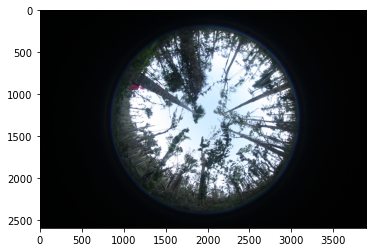

In [6]:
#Checking output of regular image load and logging message
img.imageLoad()

06:25 | DEBUG   | BluePic         | converted image to blue...


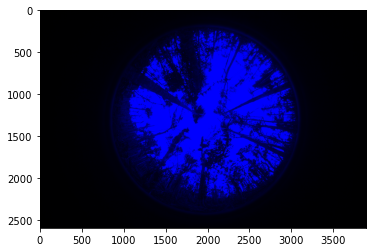

In [7]:
#Checking output of blue-transformed image and logging message
img.BluePic()

06:26 | DEBUG   | bwPic           | converted image to BW ...threshold...


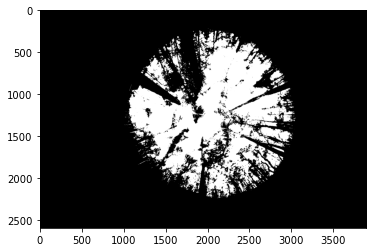

In [8]:
#Checking output of bw-transformed image and logging message
img.bwPic()